<a href="https://colab.research.google.com/github/eeuuais/kaggle_review/blob/main/(3_1)Start_Here_A_Gentle_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 과거 대출 신청 데이터를 사용하여 신청자가 대출금을 상환할 수 있는지 여부를 예측하는 대회입니다.
- application_train/application_test 홈 크레딧의 각 대출 애플리케이션에 대한 정보가 포함된 기본 교육 및 테스트 데이터입니다. 모든 대출에는 자체 행이 있으며 기능 SK_ID_CURR로 식별 됩니다. training data의 target 데이터는 0 : 대출금이 상환되었거나, 1: 대출금이 상환되지 않았음을 나타낸다.

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# List files available
print(os.listdir("../content/drive/My Drive/Colab Notebooks/kaggle_data/"))

['application_test.csv', 'application_train.csv', 'porto_test.csv', 'porto_train.csv', 'netflix_titles.csv', 'gender_submission.csv', 'test.csv', 'train.csv', 'netflix_logo.jpg', 'disney.csv', 'disney.jpg']


In [4]:
# Training data
app_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle_data/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Testing data features
app_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle_data/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


EDA
- 대상 열의 분포 조사 : 
목표는 우리가 예측하도록 요청받은 것입니다. 대출에 대한 0은 제때에 상환되었거나 고객이 지불에 어려움을 겪었음을 나타내는 1입니다. 먼저 각 범주에 속하는 대출의 수를 검토할 수 있습니다.

In [6]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<Axes: ylabel='Frequency'>

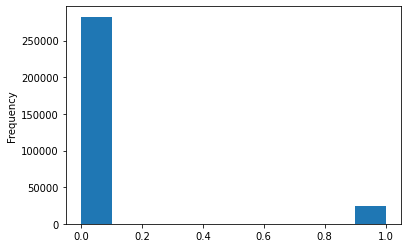

In [7]:
app_train['TARGET'].astype(int).plot.hist()

이 정보에서 우리는 이것이 불균형 클래스 문제임을 알 수 있습니다. 상환되지 않은 대출보다 제때에 상환된 대출이 훨씬 더 많습니다. 보다 정교한 기계 학습 모델에 들어가면 이러한 불균형을 반영하기 위해 데이터의 표현으로 클래스에 가중치를 부여할 수 있습니다.
=> target데이터의 비율을 살펴보니 0클래스가 지나치게 많은 것을 확인할 수 있었습니다.

-여기서 우리는 제때 갚지 못한 대출보다 제때 갚은 대출의 비율이 훨씬 많다는 것을 알고, 이러한 불균형을 반영하기 위해서 데이터의 표현에 따라 클래스의 가중치를 부여할 수 있다는 아이디어를 가질 수 있습니다.

결측값 조사
다음으로 각 열에서 누락된 값의 수와 백분율을 볼 수 있습니다.

In [8]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
# Missing values statistics

missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


기계 학습 모델을 구축할 때가 되면 이러한 누락된 값(대치라고 함)을 채워야 합니다. 이후 작업에서는 대치할 필요 없이 누락된 값을 처리할 수 있는 XGBoost와 같은 모델을 사용할 것입니다. 또 다른 옵션은 누락된 값의 비율이 높은 열을 삭제하는 것이지만 이러한 열이 모델에 도움이 될지 미리 알 수는 없습니다. 따라서 지금은 모든 열을 유지합니다.

열 유형
각 데이터 유형의 열 수를 살펴보겠습니다. int64 및 float64는 숫자 변수(이산 또는 연속일 수 있음)입니다. 개체 열은 문자열을 포함하며 범주형 기능입니다. .

In [10]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

이제 각 개체(범주형) 열의 고유 항목 수를 살펴보겠습니다.

In [11]:
# Number of unique classes in each object column

app_train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

대부분의 범주형 변수에는 상대적으로 적은 수의 고유 항목이 있습니다. 이러한 범주형 변수를 처리할 방법을 찾아야 합니다!

## Encoding Categorical Variables

더 진행하기 전에 성가신 범주형 변수를 처리해야 합니다. 불행하게도 기계 학습 모델은 범주형 변수를 처리할 수 없습니다(LightGBM과 같은 일부 모델 제외). 따라서 이러한 변수를 모델에 전달하기 전에 이러한 변수를 숫자로 인코딩(표현)하는 방법을 찾아야 합니다. 이 프로세스를 수행하는 두 가지 주요 방법이 있습니다.

- 레이블 인코딩: 범주형 변수의 각 고유 범주를 정수로 할당합니다. 새 열이 생성되지 않습니다. 아래에 예가 나와 있습니다.
- 원-핫 인코딩: 범주형 변수의 각 고유 범주에 대해 새 열을 만듭니다. 각 관찰은 해당 범주에 대한 열에서 1을 받고 다른 모든 새 열에서 0을 받습니다.

- 레이블 인코딩의 문제점은 범주에 임의의 순서를 부여한다는 것입니다. 각 범주에 할당된 값은 무작위이며 범주 고유의 측면을 반영하지 않습니다. 위의 예에서 프로그래머는 4를, 데이터 과학자는 1을 받지만 동일한 프로세스를 다시 수행하면 레이블이 반전되거나 완전히 다를 수 있습니다. 정수의 실제 할당은 임의적입니다. 따라서 레이블 인코딩을 수행할 때 모델은 기능의 상대적 값(예: 프로그래머 = 4 및 데이터 과학자 = 1)을 사용하여 원하는 가중치가 아닌 가중치를 할당할 수 있습니다. 범주형 변수(예: 남성/여성)에 대해 두 개의 고유한 값만 있는 경우 레이블 인코딩이 적합하지만 고유한 범주가 2개 이상인 경우 원-핫 인코딩이 안전한 옵션입니다.

- 이러한 접근 방식의 상대적 장점에 대해 약간의 논쟁이 있으며 일부 모델은 문제 없이 레이블로 인코딩된 범주형 변수를 처리할 수 있습니다. 다음은 좋은 스택 오버플로 토론입니다. 클래스가 많은 범주형 변수의 경우 원-핫 인코딩이 범주에 임의의 값을 부과하지 않기 때문에 가장 안전한 접근 방식이라고 생각합니다(그리고 이것은 개인적인 의견일 뿐입니다). 원-핫 인코딩의 유일한 단점은 기능(데이터 차원)의 수가 범주가 많은 범주형 변수로 폭발할 수 있다는 것입니다. 이를 처리하기 위해 원-핫 인코딩을 수행한 후 PCA 또는 다른 차원 감소 방법을 수행하여 차원 수를 줄일 수 있습니다(여전히 정보를 보존하려고 시도하면서).

- 이 노트북에서는 범주가 2개인 모든 범주형 변수에 대해 레이블 인코딩을 사용하고 범주가 2개 이상인 범주형 변수에 대해 One-Hot Encoding을 사용합니다. 이 프로세스는 프로젝트가 진행됨에 따라 변경해야 할 수도 있지만 지금은 이것이 우리를 어디로 데려가는지 볼 것입니다. (우리는 또한 이 노트북에서 차원 감소를 사용하지 않을 것이지만 향후 반복에서 탐색할 것입니다).

## Label Encoding and One-Hot Encoding

위에서 설명한 정책을 구현해 보겠습니다. 2개의 고유한 범주가 있는 모든 범주형 변수(dtype == 개체)에 대해 레이블 인코딩을 사용하고 2개 이상의 고유한 범주가 있는 범주형 변수에 대해 원-핫 인코딩을 사용합니다.

레이블 인코딩에는 Scikit-Learn LabelEncoder를 사용하고 원-핫 인코딩에는 pandas get_dummies(df) 함수를 사용합니다.

In [12]:
# Create a label encoder object

le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            #Train on the training data
            le.fit(app_train[col])
            #Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            # keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [13]:
# one-hot encoding of categorical variables

app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


## 교육 및 테스트 데이터 정렬
- 학습 데이터와 테스트 데이터 모두에 동일한 기능(열)이 있어야 합니다. 원-핫 인코딩은 테스트 데이터에 표시되지 않은 범주가 있는 일부 범주형 변수가 있었기 때문에 훈련 데이터에 더 많은 열을 생성했습니다. 테스트 데이터에 없는 훈련 데이터의 열을 제거하려면 데이터 프레임을 정렬해야 합니다. 먼저 교육 데이터에서 대상 열을 추출합니다(테스트 데이터에는 없지만 이 정보를 유지해야 하기 때문). 정렬을 수행할 때 행이 아닌 열을 기준으로 데이터 프레임을 정렬하려면 axis = 1로 설정해야 합니다!

In [14]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


교육 및 테스트 데이터 세트는 이제 기계 학습에 필요한 동일한 기능을 갖습니다. 원-핫 인코딩으로 인해 기능 수가 크게 증가했습니다. 어느 시점에서 데이터 세트의 크기를 줄이기 위해 차원 축소(관련 없는 기능 제거)를 시도하고 싶을 것입니다.

EDA로 돌아가서-
- 이상 현상 Anomalies
EDA를 수행할 때 항상 주의해야 할 한 가지 문제는 데이터 내의 이상 현상입니다. 이는 숫자를 잘못 입력했거나 측정 장비의 오류 때문이거나 유효하지만 극단적인 측정값일 수 있습니다. 변칙을 정량적으로 지원하는 한 가지 방법은 describe 메서드를 사용하여 열의 통계를 보는 것입니다. DAYS_BIRTH 열의 숫자는 현재 대출 신청과 관련하여 기록되기 때문에 음수입니다. 이러한 통계를 연도별로 보려면 -1을 곱하고 1년의 일수로 나눌 수 있습니다.

In [15]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

그 나이는 합리적으로 보입니다. 상한 또는 하한에 연령에 대한 특이치가 없습니다. 취업일은 어떻게 되나요?

In [16]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

잘못된 것 같습니다! 최대값(양수인 것 제외)은 약 1000년입니다!

Text(0.5, 0, 'Days Employment')

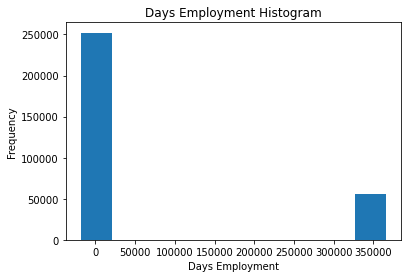

In [17]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

이상 클라이언트의 하위 집합을 살펴보고 나머지 클라이언트보다 불이행률이 높은지 낮은지 살펴보겠습니다.

In [18]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


음, 그것은 매우 흥미 롭습니다! 이상 징후의 불이행률이 더 낮은 것으로 나타났습니다.

이상 징후 처리는 정해진 규칙 없이 정확한 상황에 따라 다릅니다. 가장 안전한 접근 방식 중 하나는 이상 항목을 누락된 값으로 설정한 다음 기계 학습 전에 채워넣는 것입니다(전가 사용). 이 경우 모든 이상 항목이 정확히 동일한 값을 가지므로 이러한 모든 대출이 공통점을 공유하는 경우 동일한 값으로 채우고 싶습니다. 비정상적인 값은 어느 정도 중요해 보이기 때문에 실제로 이러한 값을 채웠는지 기계 학습 모델에 알리고 싶습니다. 해결 방법으로 숫자가 아닌 비정상 값(np.nan)을 채운 다음 값이 비정상인지 여부를 나타내는 새 부울 열을 만듭니다.

Text(0.5, 0, 'Days Employment')

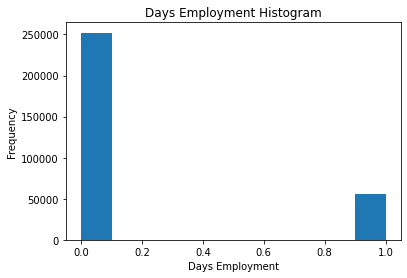

In [23]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# histogram 안그려져서 아래 코드 추가
app_train = app_train.astype(float)
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

분포는 우리가 기대하는 것과 훨씬 더 일치하는 것으로 보이며, 이러한 값이 원래 비정상적임을 모델에 알리기 위해 새 열도 생성했습니다(왜냐하면 일부 값, 아마도 중앙값으로 nans를 채워야 하기 때문입니다. 열의). 데이터 프레임에 DAYS가 있는 다른 열은 명백한 특이점이 없는 것으로 예상되는 것으로 보입니다.

매우 중요한 참고 사항으로 훈련 데이터에 수행하는 모든 작업은 테스트 데이터에도 수행해야 합니다. 새 열을 만들고 테스트 데이터에서 np.nan으로 기존 열을 채우도록 합시다.

In [24]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


상관관계
이제 범주형 변수와 이상값을 처리했으므로 EDA를 계속 살펴보겠습니다. 데이터를 시도하고 이해하는 한 가지 방법은 기능과 대상 간의 상관 관계를 찾는 것입니다. .corr 데이터 프레임 방법을 사용하여 모든 변수와 대상 사이의 Pearson 상관 계수를 계산할 수 있습니다.

상관 계수는 기능의 "관련성"을 나타내는 가장 좋은 방법은 아니지만 데이터 내에서 가능한 관계에 대한 아이디어를 제공합니다. 상관 계수의 절대값에 대한 일반적인 해석은 다음과 같습니다.

- .00-.19 "매우 약함"
- .20-.39 "약함"
- .40-.59 "보통"
- .60-.79 "강함"
- .80-1.0 "매우 강함"

In [25]:
# Find correlations with the target and sort

correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most positive correlations: \n', correlations.tail(15))
print('\nMost Nagative correlations: \n', correlations.head(15))

Most positive correlations: 
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
DAYS_EMPLOYED_ANOM                                        NaN
Name: TARGET, dtype: float64

Most Nagat

몇 가지 더 중요한 상관관계를 살펴보겠습니다. DAYS_BIRTH가 가장 긍정적인 상관관계입니다. (변수 자체와의 상관관계가 항상 1이기 때문에 TARGET을 제외하고!) 문서를 보면 DAYS_BIRTH는 대출 당시 클라이언트의 나이를 마이너스 날짜로 나타낸 것입니다(어떤 이유에서든!). 상관 관계는 양수이지만 이 기능의 값은 실제로 음수입니다. 즉, 고객이 나이가 들수록 대출 채무 불이행 가능성이 낮아집니다(예: 목표 == 0). 약간 혼란스럽기 때문에 기능의 절대값을 사용하면 상관관계가 음수가 됩니다.

## Effect of Age on Repayment

In [26]:
# Find the correlateions of positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

고객이 나이가 들수록 대상과 음의 선형 관계가 있습니다. 즉, 고객이 나이가 들면 대출금을 제때에 더 자주 상환하는 경향이 있습니다.

이 변수를 살펴보도록 하겠습니다. 먼저 나이에 대한 히스토그램을 만들 수 있습니다. 플롯을 좀 더 이해하기 쉽게 만들기 위해 x축을 연도로 표시합니다.

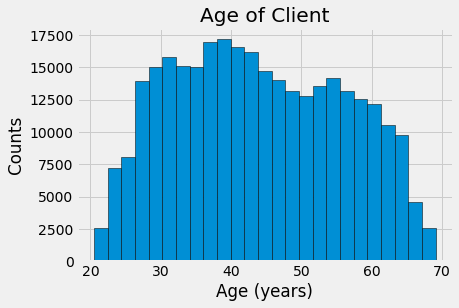

In [27]:
# Set the style plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Counts');

그 자체로 연령 분포는 모든 연령이 합리적이기 때문에 이상값이 없다는 것 외에는 많은 것을 알려주지 않습니다. 나이가 대상에 미치는 영향을 시각화하기 위해 다음으로 대상 값으로 색상이 지정된 커널 밀도 추정 플롯(KDE)을 만듭니다. 커널 밀도 추정 플롯은 단일 변수의 분포를 보여주며 평활화된 히스토그램으로 생각할 수 있습니다(각 데이터 포인트에서 커널, 일반적으로 가우시안을 계산한 다음 모든 개별 커널을 평균하여 단일 평활을 개발하여 생성됨). 곡선). 이 그래프에는 seaborn kdeplot을 사용합니다.

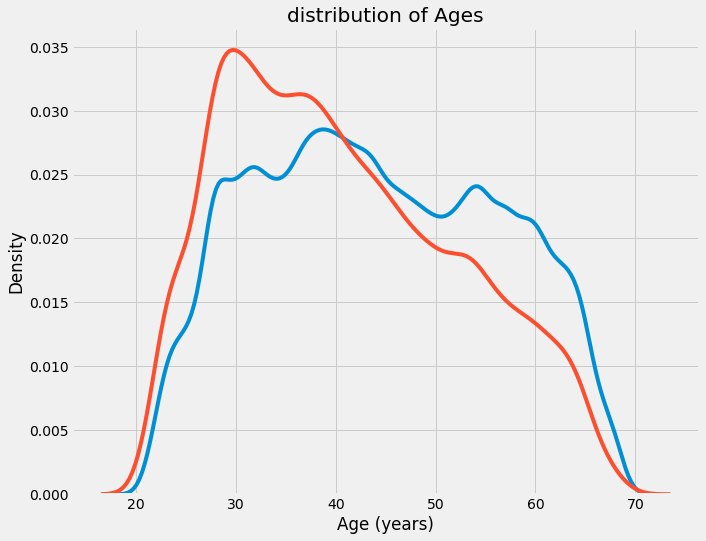

In [28]:
plt.figure(figsize = (10, 8))

# KDE plost of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('distribution of Ages');

대상 == 1 곡선은 범위의 더 젊은 쪽 끝으로 기울어집니다. 이것은 유의미한 상관 관계는 아니지만(-0.07 상관 계수), 이 변수는 대상에 영향을 미치기 때문에 기계 학습 모델에서 유용할 것입니다. 이 관계를 다른 방식으로 살펴보겠습니다. 연령대별 평균 대출 상환 실패율입니다.

이 그래프를 만들기 위해 먼저 연령 범주를 각각 5년의 빈으로 자릅니다. 그런 다음 각 빈에 대해 각 연령 범주에서 상환되지 않은 대출 비율을 알려주는 대상의 평균 값을 계산합니다.

In [29]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1.0,9461.0,25.920548,"(25.0, 30.0]"
1,0.0,16765.0,45.931507,"(45.0, 50.0]"
2,0.0,19046.0,52.180822,"(50.0, 55.0]"
3,0.0,19005.0,52.068493,"(50.0, 55.0]"
4,0.0,19932.0,54.608219,"(50.0, 55.0]"
5,0.0,16941.0,46.413699,"(45.0, 50.0]"
6,0.0,13778.0,37.747945,"(35.0, 40.0]"
7,0.0,18850.0,51.643836,"(50.0, 55.0]"
8,0.0,20099.0,55.065753,"(55.0, 60.0]"
9,0.0,14469.0,39.641096,"(35.0, 40.0]"


In [30]:
# Group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


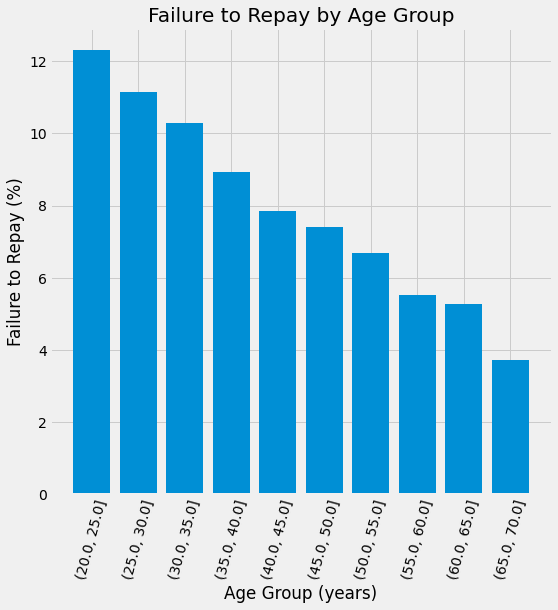

In [31]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

분명한 경향이 있습니다. 젊은 지원자들이 대출금을 상환하지 않을 가능성이 더 높습니다! 갚지 못하는 비율은 최연소 3개 연령층에서 10% 이상, 최고령 연령층에서 5% 미만이다.

이것은 은행에서 직접 사용할 수 있는 정보입니다. 젊은 고객은 대출금을 상환할 가능성이 낮기 때문에 더 많은 지침이나 재무 계획 팁을 제공해야 합니다. 이것은 은행이 젊은 고객을 차별해야 한다는 의미는 아니지만 젊은 고객이 제때 지불할 수 있도록 예방 조치를 취하는 것이 현명할 것입니다.

외부 소스
대상과 가장 강한 음의 상관관계가 있는 3개의 변수는 EXT_SOURCE_1, EXT_SOURCE_2 및 EXT_SOURCE_3입니다. 설명서에 따르면 이러한 기능은 "외부 데이터 소스의 정규화된 점수"를 나타냅니다. 이것이 정확히 무엇을 의미하는지는 모르겠지만 수많은 데이터 소스를 사용하여 만들어진 일종의 누적 신용 등급일 수 있습니다.

이러한 변수를 살펴보겠습니다.

첫째, EXT_SOURCE 기능과 대상 및 서로 간의 상관 관계를 표시할 수 있습니다.

In [32]:
# Extract the EXT_SOURCE variable and show correlations

ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlatoin Heatmap')

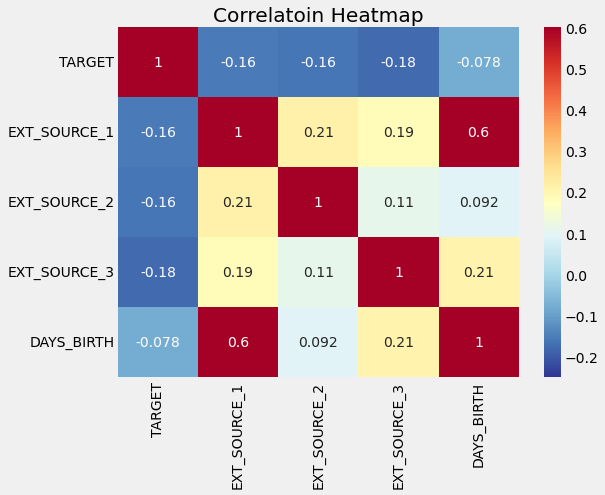

In [33]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot=True, vmax = 0.6)
plt.title('Correlatoin Heatmap')

3개의 EXT_SOURCE 기능 모두 대상과 음의 상관관계를 가지며, 이는 EXT_SOURCE의 값이 증가할수록 고객이 대출금을 상환할 가능성이 더 높다는 것을 나타냅니다. 또한 DAYS_BIRTH가 EXT_SOURCE_1과 양의 상관관계가 있음을 알 수 있습니다. 이는 이 점수의 요인 중 하나가 클라이언트 연령일 수 있음을 나타냅니다.

다음으로 대상 값에 따라 색상이 지정된 이러한 각 기능의 분포를 볼 수 있습니다. 이렇게 하면 이 변수가 대상에 미치는 영향을 시각화할 수 있습니다.

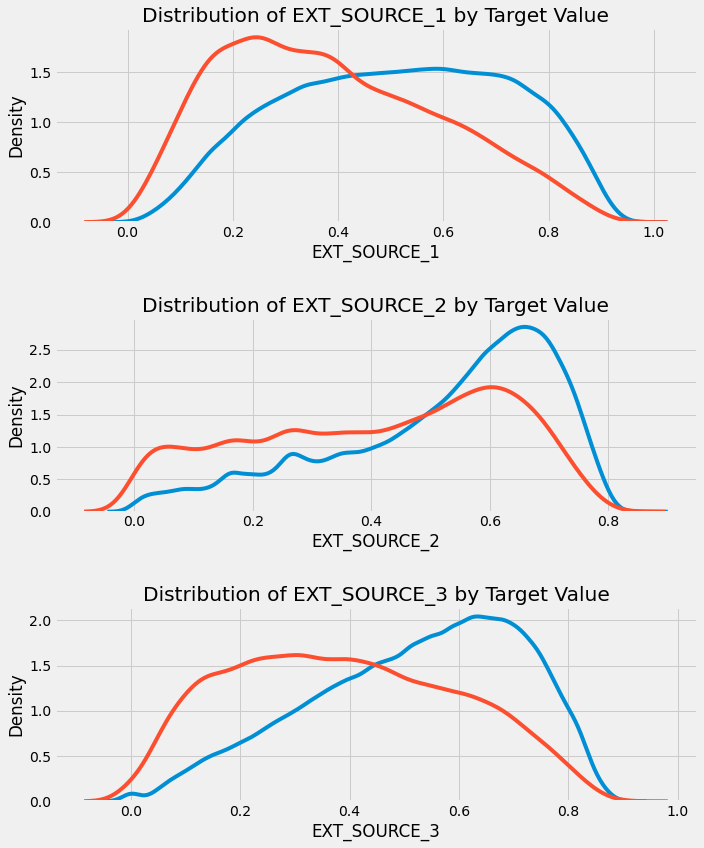

In [34]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)

    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')

    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3은 대상 값 간의 가장 큰 차이를 표시합니다. 이 기능이 신청자가 대출을 상환할 가능성과 어떤 관계가 있음을 분명히 알 수 있습니다. 관계는 그리 강하지 않습니다(사실 모두 매우 약한 것으로 간주되지만 이러한 변수는 기계 학습 모델이 지원자가 대출금을 제때에 상환할지 여부를 예측하는 데 여전히 유용합니다.

쌍 플롯 pairs plot
최종 탐색 플롯으로 EXT_SOURCE 변수와 DAYS_BIRTH 변수의 쌍 플롯을 만들 수 있습니다. Pairs Plot은 단일 변수의 분포뿐만 아니라 여러 변수 쌍 간의 관계를 볼 수 있기 때문에 훌륭한 탐색 도구입니다. 여기서 우리는 seaborn 시각화 라이브러리와 PairGrid 함수를 사용하여 위쪽 삼각형에 산점도, 대각선에 히스토그램, 아래쪽 삼각형에 2D 커널 밀도 플롯 및 상관 계수가 있는 Pairs Plot을 만듭니다.

이 코드를 이해하지 못하더라도 괜찮습니다! Python으로 플로팅하는 것은 지나치게 복잡할 수 있으며 가장 간단한 그래프 이외의 모든 경우에는 일반적으로 기존 구현을 찾아 코드를 수정합니다(반복하지 마세요)!

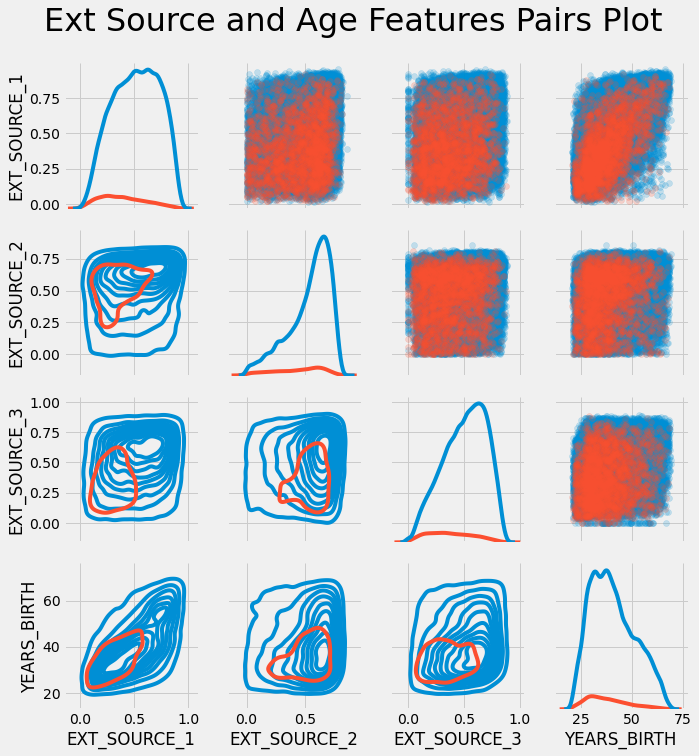

In [40]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

이 도표에서 빨간색은 상환되지 않은 대출을 나타내고 파란색은 지불된 대출을 나타냅니다. 데이터 내에서 다양한 관계를 볼 수 있습니다. EXT_SOURCE_1과 DAYS_BIRTH(또는 이에 상응하는 YEARS_BIRTH) 사이에 적당한 양의 선형 관계가 있는 것으로 보이며, 이는 이 기능이 클라이언트의 나이를 고려할 수 있음을 나타냅니다.

Kaggle 경쟁은 기능 엔지니어링에 의해 이깁니다. 이러한 승리는 데이터에서 가장 유용한 기능을 생성할 수 있는 사람입니다. (최소한 구조화된 데이터의 경우 모두 그래디언트 부스팅의 변형인 경향이 있기 때문에 이것은 대부분의 경우 우승 모델에 해당합니다.) 이것은 기계 학습의 패턴 중 하나를 나타냅니다. 기능 엔지니어링은 모델 구축 및 하이퍼 매개 변수 튜닝보다 투자 수익이 더 큽니다. 이것은 주제에 관한 훌륭한 기사입니다.) Andrew Ng는 "응용 기계 학습은 기본적으로 기능 엔지니어링입니다."라고 즐겨 말합니다.

올바른 모델과 최적의 설정을 선택하는 것이 중요하지만 모델은 주어진 데이터에서만 학습할 수 있습니다. 이 데이터가 가능한 한 작업과 관련이 있는지 확인하는 것은 데이터 과학자의 일입니다(그리고 우리를 도와줄 자동화된 도구도 있을 수 있습니다).

기능 엔지니어링은 일반적인 프로세스를 말하며 기능 구성(기존 데이터에서 새 기능 추가)과 기능 선택(가장 중요한 기능만 선택하거나 다른 차원 축소 방법 선택)을 모두 포함할 수 있습니다. 기능을 생성하고 기능을 선택하는 데 사용할 수 있는 많은 기술이 있습니다.

다른 데이터 소스를 사용하기 시작할 때 많은 기능 엔지니어링을 수행할 것이지만 이 노트북에서는 두 가지 간단한 기능 구성 방법만 시도할 것입니다.

- 다항식 기능
- 도메인 지식 기능

다항식 특징 Polynomial Features
하나의 간단한 피쳐 생성 방법은 다항식 피쳐라고 합니다. 이 방법에서는 기존 기능과 기존 기능 간의 상호 작용 조건인 기능을 만듭니다. 예를 들어 EXT_SOURCE_1^2 및 EXT_SOURCE_2^2 변수와 EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2 등과 같은 변수를 생성할 수 있습니다. 여러 개별 변수의 조합인 이러한 기능을 변수 간의 상호 작용을 캡처하기 때문에 상호 작용 항이라고 합니다. 즉, 두 개의 변수 자체는 타겟에 큰 영향을 미치지 않을 수 있지만, 두 변수를 하나의 상호 작용 변수로 결합하면 타겟과의 관계를 나타낼 수 있습니다. 상호 작용 용어는 여러 변수의 효과를 포착하기 위해 통계 모델에서 일반적으로 사용되지만 기계 학습에서는 자주 사용되지 않습니다. 그럼에도 불구하고 고객이 대출금을 상환할지 여부를 예측하는 모델에 도움이 되는지 알아보기 위해 몇 가지를 시도해볼 수 있습니다.

Jake VanderPlas는 더 많은 정보를 원하는 사람들을 위해 훌륭한 저서 Python for Data Science에서 다항식 기능에 대해 설명합니다.

다음 코드에서는 EXT_SOURCE 변수와 DAYS_BIRTH 변수를 사용하여 다항식 기능을 만듭니다. Scikit-Learn에는 다항식과 상호 작용 항을 지정된 정도까지 생성하는 PolynomialFeatures라는 유용한 클래스가 있습니다. 차수 3을 사용하여 결과를 볼 수 있습니다(다항식 기능을 생성할 때 차수를 너무 높게 사용하지 않는 것이 좋습니다. 기능의 수가 차수에 따라 기하급수적으로 증가하고 문제가 발생할 수 있기 때문입니다. 과적합).

In [41]:
# Make a new dataframe for ploynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# Imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_teatures_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [ ]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

=> 여기서 자꾸 세션 따운됨,,, 왜지

이것은 상당한 수의 새로운 기능을 생성합니다. 이름을 얻으려면 다항식 기능 get_feature_names 메서드를 사용해야 합니다.

In [1]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

NameError: ignored

3차까지 승급된 개별 기능과 상호작용 항이 있는 35개의 기능이 있습니다. 이제 이러한 새로운 기능이 대상과 상관관계가 있는지 확인할 수 있습니다.

In [ ]:
# Create a dataframe of the feature
poly_feaures = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

새 변수 중 일부는 원래 기능보다 대상과 더 큰(절대 크기 측면에서) 상관 관계가 있습니다. 기계 학습 모델을 구축할 때 이러한 기능을 사용하거나 사용하지 않고 실제로 모델 학습에 도움이 되는지 확인할 수 있습니다.

이러한 기능을 교육 및 테스트 데이터의 복사본에 추가한 다음 기능이 있는 모델과 없는 모델을 평가합니다. 기계 학습에서 접근 방식이 효과가 있는지 알 수 있는 유일한 방법은 직접 사용해 보는 것입니다!

In [ ]:
# Put test features into dataframe

poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

도메인 지식 피쳐
내가 신용 전문가가 아니기 때문에 이것을 "도메인 지식"이라고 부르는 것이 완전히 옳지 않을 수도 있지만 아마도 이것을 "제한된 금융 지식을 적용하려는 시도"라고 부를 수 있을 것입니다. 이러한 마음가짐에서 고객이 대출을 불이행할지 여부를 알려주는 데 중요할 수 있다고 생각하는 것을 포착하려고 시도하는 몇 가지 기능을 만들 수 있습니다. 여기서는 Aguiar의 이 스크립트에서 영감을 받은 다섯 가지 기능을 사용하겠습니다.

CREDIT_INCOME_PERCENT: 고객 소득에 대한 신용 금액의 백분율
ANNUITY_INCOME_PERCENT: 고객 소득 대비 대출 연금 비율
CREDIT_TERM: 지불 기간(월)(연금은 월별 지불 금액이므로
DAYS_EMPLOYED_PERCENT: 고객의 연령 대비 고용된 일수의 백분율
다시 한 번 이러한 기능을 탐색한 Aguiar와 그의 훌륭한 스크립트에 감사드립니다.

In [ ]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [ ]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

새 변수 시각화
그래프에서 이러한 도메인 지식 변수를 시각적으로 탐색해야 합니다. 이들 모두에 대해 TARGET 값으로 색상이 지정된 동일한 KDE 플롯을 만들 것입니다.

In [ ]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

이러한 새로운 기능이 유용할지 미리 말하기는 어렵습니다. 확실히 알 수 있는 유일한 방법은 직접 사용해 보는 것입니다!

베이스라인
순진한 베이스라인의 경우 테스트 세트의 모든 예에 대해 동일한 값을 추측할 수 있습니다. 우리는 대출금을 상환하지 않을 확률을 예측하라는 요청을 받았기 때문에 완전히 확신할 수 없는 경우 테스트 세트에 대한 모든 관찰에 대해 0.5를 추측할 것입니다. 이것은 우리에게 경쟁에서 0.5의 AUC ROC(Reciever Operating Characteristic Area Under the Curve)를 얻을 것입니다(분류 작업에 대한 무작위 추측은 0.5를 얻습니다).

우리는 우리가 얻을 점수를 이미 알고 있기 때문에 순진한 기준 추측을 할 필요가 없습니다. 실제 기준선인 로지스틱 회귀에 대해 약간 더 정교한 모델을 사용하겠습니다.

로지스틱 회귀 구현
여기서는 세부 사항을 설명하기보다는 모델 구현에 중점을 두겠지만 기계 학습 알고리즘 이론에 대해 더 자세히 알고 싶은 분들에게는 An Introduction to Statistical Learning과 Hands-On Machine Learning with Scikit-Learn and TensorFlow를 모두 추천합니다. . 이 두 책 모두 이론과 모델을 만드는 데 필요한 코드(각각 R 및 Python)를 제공합니다. 둘 다 배우는 가장 좋은 방법은 실천하는 것이라는 마음가짐으로 가르치고 있으며 매우 효과적입니다!

기준선을 얻기 위해 범주형 변수를 인코딩한 후 모든 기능을 사용합니다. 누락된 값(대치)을 채우고 기능 범위를 정규화(기능 스케일링)하여 데이터를 전처리합니다. 다음 코드는 이러한 전처리 단계를 모두 수행합니다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

우리는 첫 번째 모델에 Scikit-Learn의 LogisticRegression을 사용할 것입니다. 기본 모델 설정에서 변경할 유일한 사항은 과적합의 양을 제어하는 정규화 매개변수 C를 낮추는 것입니다(낮은 값은 과적합을 줄여야 함). 이렇게 하면 기본 LogisticRegression보다 약간 더 나은 결과를 얻을 수 있지만 향후 모델에 대해서는 여전히 낮은 기준을 설정합니다.

여기서는 친숙한 Scikit-Learn 모델링 구문을 사용합니다. 먼저 모델을 생성한 다음 .fit을 사용하여 모델을 교육한 다음 .predict_proba를 사용하여 테스트 데이터에 대한 예측을 수행합니다(0 또는 1이 아닌 확률을 원함을 기억하십시오). .

In [ ]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

모델이 훈련되었으므로 모델을 사용하여 예측할 수 있습니다. 우리는 대출금을 지불하지 않을 확률을 예측하고 싶기 때문에 모델 predict.proba 방법을 사용합니다. 이것은 m x 2 배열을 반환합니다. 여기서 m은 관측값의 수입니다. 첫 번째 열은 대상이 0일 확률이고 두 번째 열은 대상이 1일 확률입니다(따라서 단일 행의 경우 두 열의 합이 1이어야 함). 우리는 대출이 상환되지 않을 확률을 원하므로 두 번째 열을 선택합니다.

다음 코드는 예측을 수행하고 올바른 열을 선택합니다.

In [ ]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

예측은 sample_submission.csv 파일에 표시된 형식이어야 하며 여기에는 SK_ID_CURR 및 TARGET의 두 열만 있습니다. 제출이라는 예측과 테스트 세트에서 이 형식으로 데이터 프레임을 생성합니다.

In [ ]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

예측은 대출이 상환되지 않을 확률을 0과 1 사이로 나타냅니다. 이러한 예측을 사용하여 지원자를 분류하는 경우 대출이 위험하다고 판단할 확률 임계값을 설정할 수 있습니다.

In [ ]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

이제 제출물이 노트북이 실행되는 가상 환경에 저장되었습니다. 제출에 액세스하려면 노트북 끝에서 커널 오른쪽 상단에 있는 파란색 Commit & Run 버튼을 누릅니다. 이렇게 하면 전체 노트북이 실행되고 실행 중에 생성된 모든 파일을 다운로드할 수 있습니다.

노트북을 실행하면 출력 하위 탭 아래의 버전 탭에서 생성된 파일을 사용할 수 있습니다. 여기에서 제출 파일을 대회에 제출하거나 다운로드할 수 있습니다. 이 노트북에는 여러 모델이 있으므로 여러 출력 파일이 있습니다.

로지스틱 회귀 기준은 제출 시 약 0.671의 점수를 받아야 합니다.

링크코드
개선된 모델: 랜덤 포레스트
기준선의 열악한 성능을 극복하기 위해 알고리즘을 업데이트할 수 있습니다. 성능에 어떤 영향을 미치는지 알아보기 위해 동일한 학습 데이터에 대해 Random Forest를 사용해 봅시다. Random Forest는 특히 수백 개의 트리를 사용할 때 훨씬 더 강력한 모델입니다. 랜덤 포레스트에서 100개의 트리를 사용합니다.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

In [ ]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

이러한 예측은 전체 노트북을 실행할 때도 사용할 수 있습니다.

이 모델은 제출 시 약 0.678의 점수를 받아야 합니다.

엔지니어링된 기능을 사용하여 예측하기
다항식 기능 및 도메인 지식이 모델을 개선했는지 확인하는 유일한 방법은 이러한 기능에 대해 모델 테스트를 훈련하는 것입니다! 그런 다음 제출 성능을 이러한 기능이 없는 모델의 성능과 비교하여 기능 엔지니어링의 효과를 측정할 수 있습니다.

In [ ]:
poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = Imputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train on the training data
random_forest_poly.fit(poly_features, train_labels)

# Make predictions on the test data
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

In [ ]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

이 모델은 경쟁에 제출되었을 때 0.678점을 받았는데, 이는 엔지니어링 기능이 없는 것과 정확히 동일합니다. 이러한 결과를 감안할 때 우리의 기능 구성이 이 경우에 도움이 된 것으로 보이지 않습니다.

도메인 기능 테스트
이제 직접 만든 도메인 기능을 테스트할 수 있습니다.

In [ ]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = Imputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

In [ ]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index = False)

This scores 0.679 when submitted which probably shows that the engineered features do not help in this model (however they do help in the Gradient Boosting Model at the end of the notebook).

In later notebooks, we will do more feature engineering by using the information from the other data sources. From experience, this will definitely help our model!

linkcode
Model Interpretation: Feature Importances
As a simple method to see which variables are the most relevant, we can look at the feature importances of the random forest. Given the correlations we saw in the exploratory data analysis, we should expect that the most important features are the EXT_SOURCE and the DAYS_BIRTH. We may use these feature importances as a method of dimensionality reduction in future work.

In [ ]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [ ]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

예상대로 가장 중요한 기능은 EXT_SOURCE 및 DAYS_BIRTH를 다루는 기능입니다. 모델에 상당한 중요성을 갖는 소수의 기능만 있음을 알 수 있습니다. 이는 성능 저하 없이 많은 기능을 삭제할 수 있음을 시사합니다(그리고 성능이 향상될 수도 있음). 기능 중요도는 다음과 같습니다. 모델을 해석하거나 차원 축소를 수행하는 가장 정교한 방법은 아니지만 예측을 할 때 모델이 고려하는 요소를 이해하기 시작할 수 있습니다.

In [ ]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

수작업으로 설계된 4가지 기능이 모두 가장 중요한 상위 15개 기능에 포함되었습니다. 이를 통해 도메인 지식이 적어도 부분적으로는 제대로 진행되고 있다는 확신을 가질 수 있습니다.

결론
이 노트북에서는 Kaggle 기계 학습 대회를 시작하는 방법을 살펴보았습니다. 먼저 데이터, 작업 및 제출물을 평가할 메트릭을 이해했는지 확인했습니다. 그런 다음 모델링에 도움이 될 수 있는 관계, 추세 또는 이상 현상을 식별하기 위해 상당히 간단한 EDA를 수행했습니다. 그 과정에서 범주형 변수 인코딩, 누락된 값 대치, 범위에 대한 기능 스케일링과 같은 필요한 전처리 단계를 수행했습니다. 그런 다음 기존 데이터에서 새 기능을 구성하여 모델에 도움이 되는지 확인했습니다.

데이터 탐색, 데이터 준비 및 기능 엔지니어링이 완료되면 개선하고자 하는 기준 모델을 구현했습니다. 그런 다음 첫 번째 점수를 능가하기 위해 약간 더 복잡한 두 번째 모델을 만들었습니다. 또한 공학적 변수를 추가했을 때의 효과를 확인하기 위한 실험도 수행했습니다.

기계 학습 프로젝트의 일반적인 개요를 따랐습니다.

문제와 데이터 이해
데이터 정리 및 서식 지정(대부분 우리를 위해 수행됨)
탐색적 데이터 분석
기준선 모델
개선된 모델
모델 해석(약간)
기계 학습 대회는 단일 메트릭에서 최고의 성능을 달성하는 데에만 관심이 있고 해석에는 관심이 없다는 점에서 일반적인 데이터 과학 문제와 약간 다릅니다. 그러나 모델이 결정을 내리는 방법을 이해하려고 시도함으로써 모델을 개선하거나 오류를 수정하기 위해 실수를 조사할 수 있습니다. 향후 노트북에서는 더 많은 데이터 소스를 통합하고 더 복잡한 모델을 구축하고(다른 사람의 코드를 따라) 점수를 향상시키는 방법을 살펴볼 것입니다.

이 노트북을 통해 이 머신 러닝 대회에 참가할 수 있었고 이제 커뮤니티의 도움을 받아 혼자 힘으로 나가 몇 가지 큰 문제를 해결할 준비가 되었기를 바랍니다.

노트북 실행: 이제 노트북이 끝났으므로 파란색 Commit & Run 버튼을 눌러 모든 코드를 한 번에 실행할 수 있습니다. 실행이 완료되면(약 10분 소요) 버전 탭과 출력 하위 탭으로 이동하여 생성된 파일에 액세스할 수 있습니다. 제출 파일은 이 탭에서 대회에 직접 제출하거나 로컬 컴퓨터에 다운로드하여 저장할 수 있습니다. 마지막 부분은 노트북을 공유하는 것입니다. 설정 탭으로 이동하여 가시성을 공개로 변경합니다. 이를 통해 전 세계가 귀하의 작업을 볼 수 있습니다!